In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
titanic = pd.read_csv('/content/Titanic.csv')

# Display the first few rows of the dataframe
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Step 1 Data Preparation

**1.1)Imputation**

In [3]:
#Fetching a list of numeric columns from dataset

numeric_cols = titanic.select_dtypes(include=np.number).columns.tolist()

#Imputing missing values for numeric columns
for column in numeric_cols:
    if titanic[column].isnull().any():
        titanic[column].fillna(titanic[column].mean(), inplace=True)

titanic.head()

<ipython-input-3-3c95e38e04b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic[column].fillna(titanic[column].mean(), inplace=True)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"


**1.2.)Selecting subset of the data**

In [4]:
titanic_subset=titanic[['pclass','sex', 'age', 'sibsp', 'survived']]

titanic_subset.head()

,pclass,sex,age,sibsp,survived
0,1st,female,29.0000,0,1
1,1st,male,0.9167,1,1
2,1st,female,2.0000,1,0
3,1st,male,30.0000,1,0
4,1st,female,25.0000,1,0


**1.3)Ensure that 'survived' is a binary variable coded as 1 (yes) or 0 (no).**

In [5]:
#checking the data type of the 'survived' column
titanic_subset['survived'].dtype




dtype('int64')

In [6]:
#Converting the pclass to numeric inorder to smoothly fit the model
titanic_subset['pclass']=titanic_subset['pclass'].map({'1st':1, '2nd':2, '3rd':3})

titanic_subset['sex'] = titanic_subset['sex'].map({'male': 0, 'female': 1})

**1.4) Split the data into training and test sets, using an 80/20 split.**

In [7]:
# Note : The spliting has done at 2 places here section 1.4 as mentioned in the docuemnt as well as in senction 2.1 as it was mentioned in notebook
# The split after QuantileBinning is more relevant but keeping this code here as well as it was mentioned in the docuement to avoid minus points.

x = titanic_subset.drop(['pclass', 'sex', 'age', 'sibsp', 'survived'], axis=1)
y = titanic_subset[['pclass', 'sex', 'age', 'sibsp', 'survived']]

# Splitting the data into training and test sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Step 2: Data Processing and Initial Analysis

**2.1.) Discretize 'age' using quantile binning**

In [8]:
def QuantileBinning(feature, bin_number):
    """
    This function takes a numerical feature and the number of bins, and
    returns the feature binned into quantile-based bins.

    Parameters:
    - feature (pandas.Series): The numerical feature to be binned.
    - bin_number (int): The number of quantile bins.

    Returns:
    - pandas.Series: A series of discrete features binned by quantile.
    """
    # Use qcut to create quantile-based bins for the feature
    # If there are fewer unique values than bins, qcut could throw an error.
    # 'duplicates' parameter handles this by dropping redundant bins.
    return pd.qcut(feature, q=bin_number, labels=False, duplicates='drop')

# One example
feature_test = pd.DataFrame(np.random.rand(100),  columns=['Column_A'])
feature_test_discrete = QuantileBinning(feature_test['Column_A'], 10)

def label_encoder(feature):
    unique_labels = pd.unique(feature)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    transformed_feature = np.array([label_to_int[label] for label in feature])
    return transformed_feature

In [9]:
# Fill missing values in 'age' with the average age
if titanic_subset['age'].isnull().any():
  titanic_subset['age'].fillna(titanic_subset['age'].mean(), inplace=True)

# Discretization
titanic_subset['age']=QuantileBinning(titanic_subset['age'], 10)

# Display the updated dataframe
titanic_subset.head()

# Split the data into 80% training and 20% test sets

x = titanic_subset.drop(['pclass', 'sex', 'age', 'sibsp', 'survived'], axis=1)
y = titanic_subset[['pclass', 'sex', 'age', 'sibsp', 'survived']]

# Splitting the data into training and test sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_train.head()

,pclass,sex,age,sibsp,survived
772,3,0,1,0,0
543,2,0,6,0,0
289,1,1,1,0,1
10,1,0,7,1,0
147,1,0,4,0,0


In [10]:
y_train.head()

,pclass,sex,age,sibsp,survived
772,3,0,1,0,0
543,2,0,6,0,0
289,1,1,1,0,1
10,1,0,7,1,0
147,1,0,4,0,0


**2.2.)Information gain**

In [11]:
# define your entropy function and information gain function
import math

def entropy(data, target_attribute):
  label_counts = data[target_attribute].value_counts()
  total_instances = len(data)
  entropy_value = 0

  for count in label_counts:
    probability = count / total_instances
    entropy_value -= probability * math.log2(probability)

  return entropy_value

def information_gain(data, split_attribute, target_attribute):
  total_entropy = entropy(data, target_attribute)
  values = data[split_attribute].unique()
  weighted_entropy = 0

  for value in values:
    subset = data[data[split_attribute] == value]
    subset_entropy = entropy(subset, target_attribute)
    weighted_entropy += (len(subset) / len(data)) * subset_entropy

  information_gain_value = total_entropy - weighted_entropy
  return information_gain_value

# Calculate Information Gain for each feature in the training set
features = ['pclass', 'sex', 'age', 'sibsp']
for feature in features:
  info_gains = information_gain(y_train, feature, 'survived')
  print(f"Information Gain for {feature}: {info_gains}")

Information Gain for pclass: 0.06353574221838065
Information Gain for sex: 0.20968297666244173
Information Gain for age: 0.018083066364024902
Information Gain for sibsp: 0.02531230300308862


In [12]:
info_gains

0.02531230300308862

So the first split should be "sex"

# Step 3

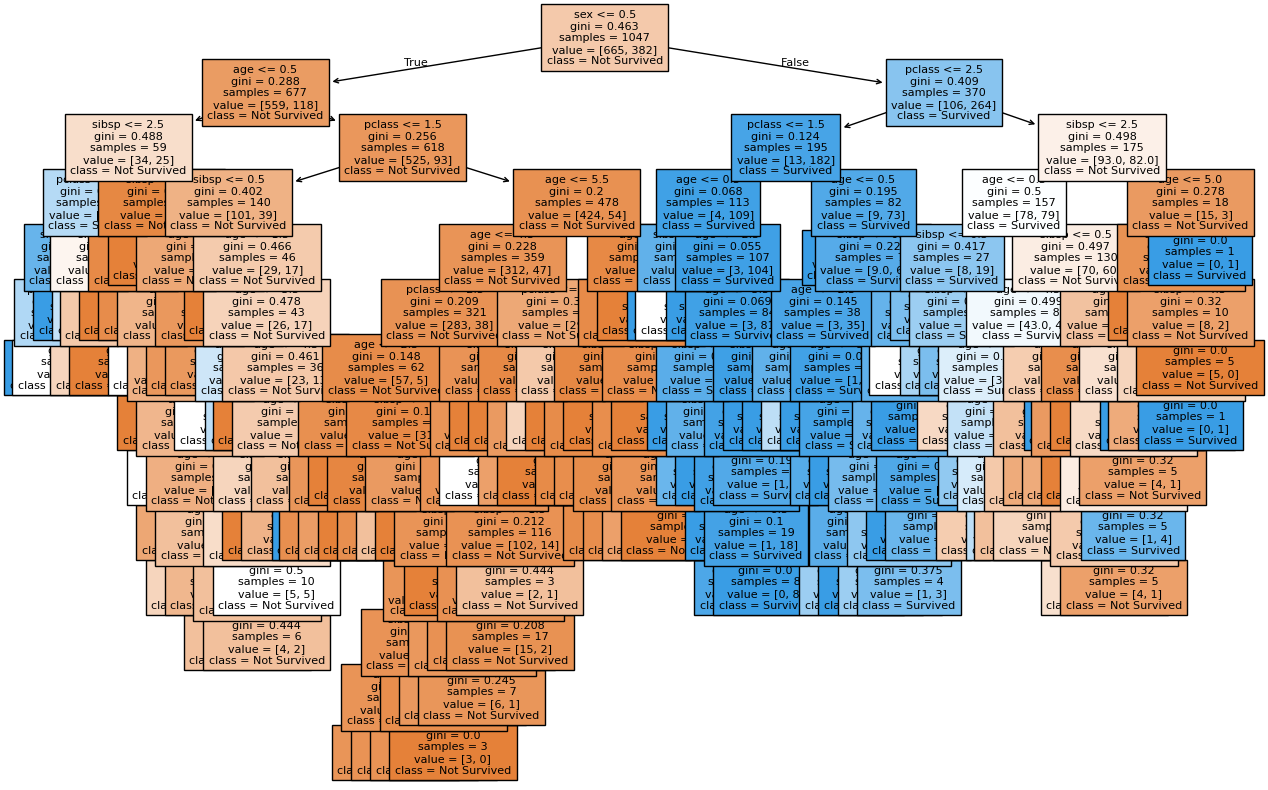

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #sklearn.metrics is not imported !!!

import matplotlib.pyplot as plt


# Instantiate the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=20030417)

# Prepare the features and target variables for training
x_train = y_train[['pclass', 'age', 'sibsp','sex']]
y_train_target = y_train['survived']


# Fit the decision tree model
dt_model.fit(x_train, y_train_target)

# Plot the full decision tree

plt.figure(figsize=(15, 10),dpi=100)
plot_tree(dt_model, feature_names=x_train.columns, class_names=['Not Survived', 'Survived'], filled=True,fontsize=8)
plt.show()

In [14]:
# Define your performance metrics including accuracy, precision, recall and F1-scorre
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1_score': f1
  }

# Make predictions on the test set
x_test = y_test[['pclass', 'age', 'sibsp','sex']]
y_test_target = y_test['survived']
y_pred = dt_model.predict(x_test)

# Calculate the metrics
metrics = calculate_metrics(y_test_target, y_pred)

# Print the metrics
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1_score'])


Accuracy: 0.7442748091603053
Precision: 0.8148148148148148
Recall: 0.559322033898305
F1 Score: 0.6633165829145728


# Step 4

**4.1.) Applying GridSearchCV() to indetify optimal max_leaf_nodes**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Applying GridSearchCV to find the optimal max_leaf_nodes
param_grid = {'max_leaf_nodes': list(range(5, 21))}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=20030417), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train_target)

# Get the best model with optimal max_leaf_nodes
best_dt_model = grid_search.best_estimator_


**4.2.) Ploting the pruned tree**

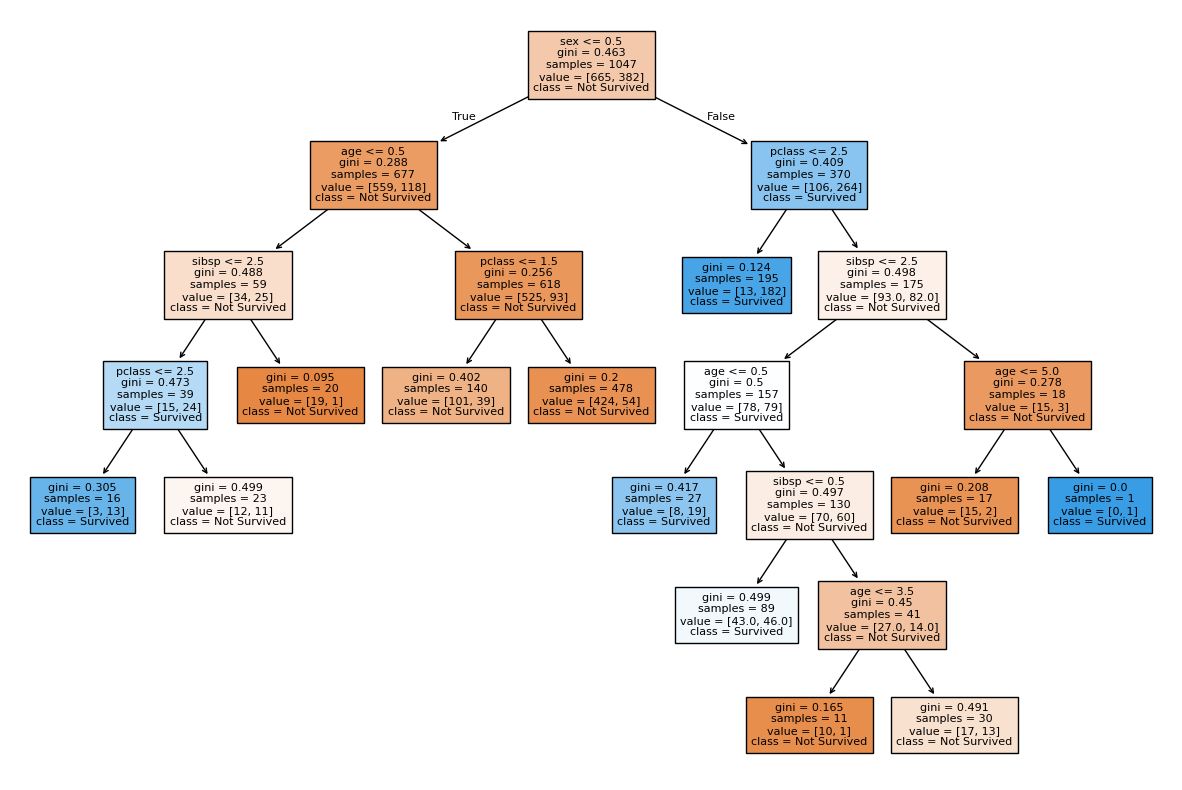

In [36]:
# Ploting the pruned decision tree
plt.figure(figsize=(15, 10), dpi=100)
plot_tree(best_dt_model, feature_names=x_train.columns, class_names=['Not Survived', 'Survived'], filled=True, fontsize=8)
plt.show()

# Making predictions on the test set with the pruned tree
y_pred_pruned = best_dt_model.predict(x_test)



**Calculating the performance matrix**

In [37]:
# Calculate the metrics for the pruned tree
metrics_pruned = calculate_metrics(y_test_target, y_pred_pruned)

# Print the performance metrics of the pruned tree
print("Performance Metrics for Pruned Tree:")
print("Accuracy:", metrics_pruned['accuracy'])
print("Precision:", metrics_pruned['precision'])
print("Recall:", metrics_pruned['recall'])
print("F1 Score:", metrics_pruned['f1_score'])


Performance Metrics for Pruned Tree:
Accuracy: 0.7519083969465649
Precision: 0.8045977011494253
Recall: 0.5932203389830508
F1 Score: 0.6829268292682927


#Step 5

**5.1.) Contructing two additional decision tree**

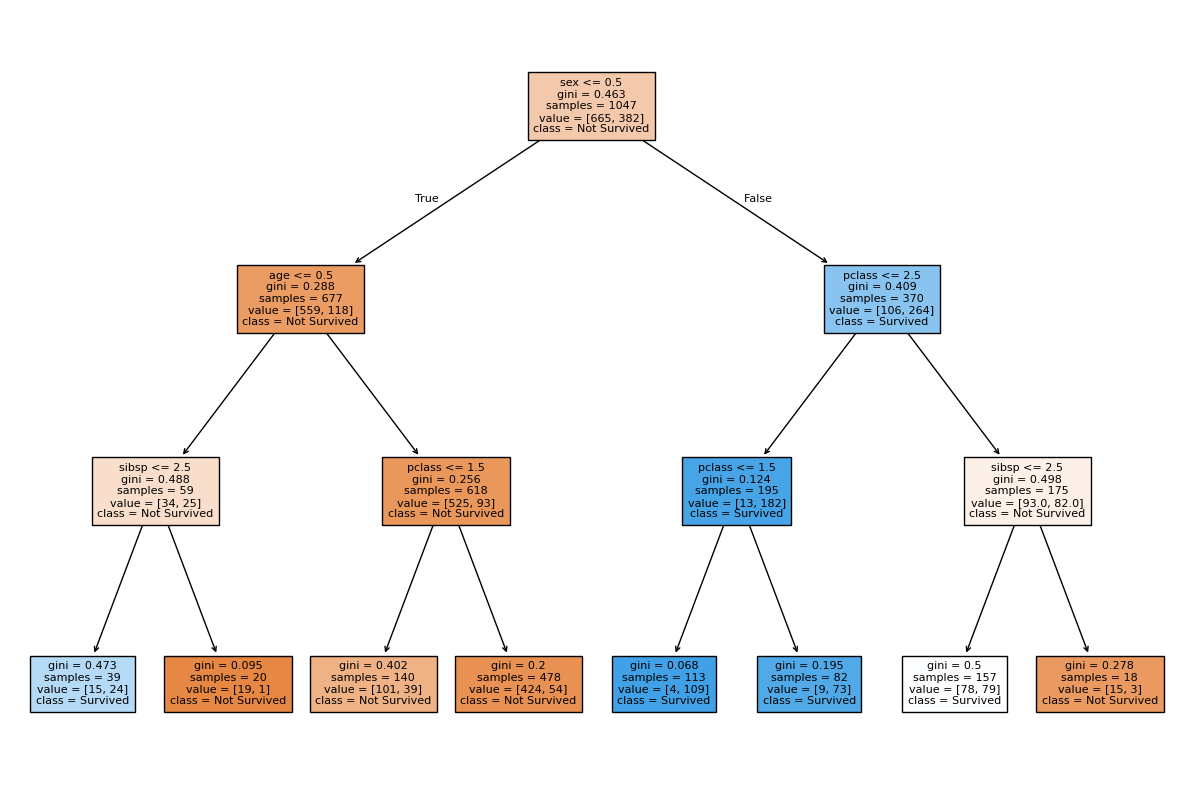

Model 2 Metrics:
Accuracy: 0.7786259541984732
Precision: 0.8
Recall: 0.6779661016949152
F1 Score: 0.7339449541284404


In [38]:
#Model 2
# Instantiating the DecisionTreeClassifier with maximum depth 3 and Gini Index
dt_model_2 = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=20030417)

# Fit the decision tree model
dt_model_2.fit(x_train, y_train_target)

# Ploting the decision tree
plt.figure(figsize=(15, 10),dpi=100)
plot_tree(dt_model_2, feature_names=x_train.columns, class_names=['Not Survived', 'Survived'], filled=True, fontsize=8)
plt.show()

# Make predictions on the test set
y_pred_2 = dt_model_2.predict(x_test)

# Calculate the metrics
metrics_2 = calculate_metrics(y_test_target, y_pred_2)

# Print the metrics
print("Model 2 Metrics:")
print("Accuracy:", metrics_2['accuracy'])
print("Precision:", metrics_2['precision'])
print("Recall:", metrics_2['recall'])
print("F1 Score:", metrics_2['f1_score'])


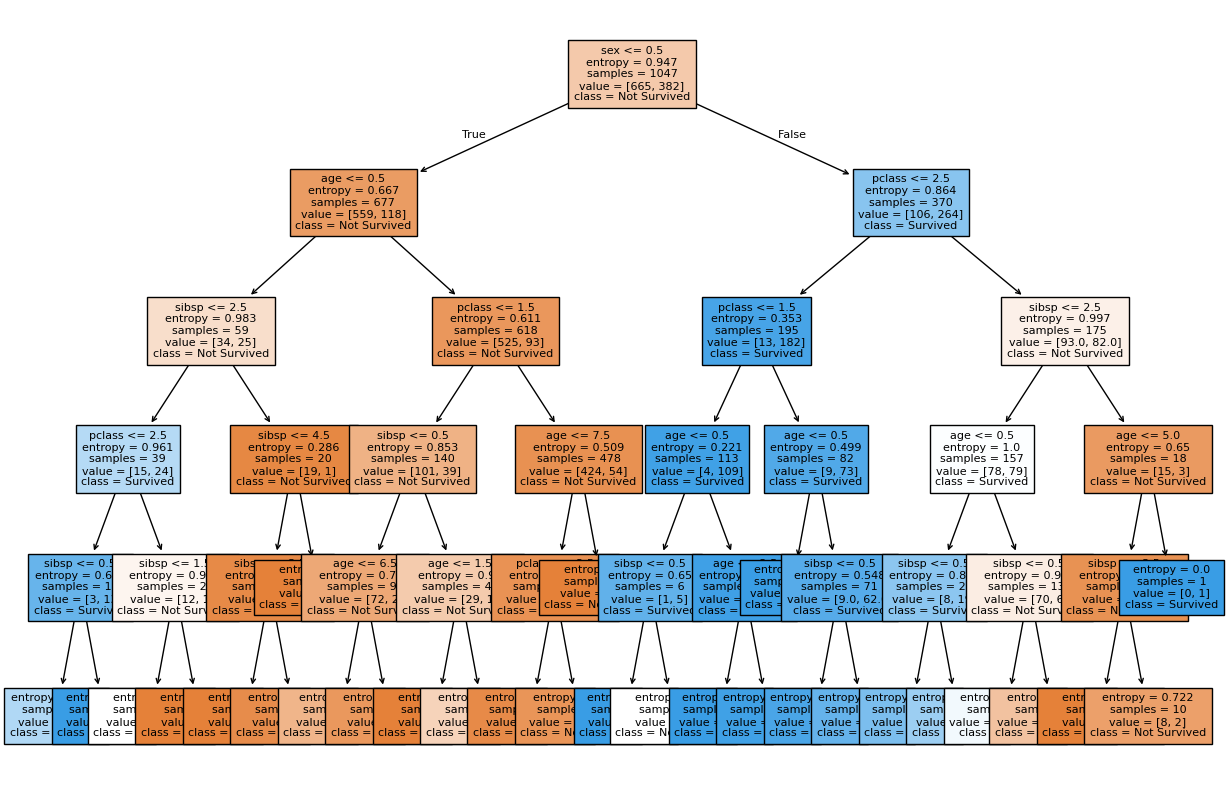

Model 3 Metrics:
Accuracy: 0.7519083969465649
Precision: 0.8045977011494253
Recall: 0.5932203389830508
F1 Score: 0.6829268292682927


In [28]:
#Model 3
# Instantiating the DecisionTreeClassifier with maximum depth 5 and Entropy
dt_model_3 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=20030417)

# Fit the decision tree model
dt_model_3.fit(x_train, y_train_target)

# Ploting the decision tree
plt.figure(figsize=(15, 10),dpi=100)
plot_tree(dt_model_3, feature_names=x_train.columns, class_names=['Not Survived', 'Survived'], filled=True, fontsize=8)
plt.show()

# Make predictions on the test set
y_pred_3 = dt_model_3.predict(x_test)

# Calculate the metrics
metrics_3 = calculate_metrics(y_test_target, y_pred_3)

# Print the metrics
print("Model 3 Metrics:")
print("Accuracy:", metrics_3['accuracy'])
print("Precision:", metrics_3['precision'])
print("Recall:", metrics_3['recall'])
print("F1 Score:", metrics_3['f1_score'])


**5.2.) Majority vote and ensemble learning model**

In [41]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# Ensemble Learning with Majority Vote
#Creating ensemble model with three previously created models
ensemble_model = VotingClassifier(estimators=[
    ('dt_model', dt_model),
    ('dt_model_2', dt_model_2),
    ('dt_model_3', dt_model_3)
], voting='hard')

ensemble_model.fit(x_train, y_train_target)
y_pred_ensemble = ensemble_model.predict(x_test)

#Calculating the matrices of the ensemble model
metrics_ensemble = calculate_metrics(y_test_target, y_pred_ensemble)
print("Performance Metrics for Ensemble Model:")
print("Accuracy:", metrics_ensemble['accuracy'])
print("Precision:", metrics_ensemble['precision'])
print("Recall:", metrics_ensemble['recall'])
print("F1 Score:", metrics_ensemble['f1_score'])


Performance Metrics for Ensemble Model:
Accuracy: 0.7480916030534351
Precision: 0.7888888888888889
Recall: 0.6016949152542372
F1 Score: 0.6826923076923077


**5.3.) Using RandomForestClassifier**

In [42]:
# Using the best max_leaf_nodes from Step 4
best_max_leaf_nodes = best_dt_model.get_params()['max_leaf_nodes']

# Training a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_leaf_nodes=best_max_leaf_nodes, random_state=20030417)
rf_model.fit(x_train, y_train_target)

# Making predictions with the Random Forest
y_pred_rf = rf_model.predict(x_test)

# Calculating metrics for the Random Forest
metrics_rf = calculate_metrics(y_test_target, y_pred_rf)

# Printing the metrics
print("Random Forest Metrics:")
print("Accuracy:", metrics_rf['accuracy'])
print("Precision:", metrics_rf['precision'])
print("Recall:", metrics_rf['recall'])
print("F1 Score:", metrics_rf['f1_score'])


Random Forest Metrics:
Accuracy: 0.7404580152671756
Precision: 0.8125
Recall: 0.5508474576271186
F1 Score: 0.6565656565656566


**Comparing the performance of random forest and ensembled model**

In [44]:
# Comparing Random Forest and Ensemble Model performance
print("\nEnsemble Model vs. Random Forest:")
print("Accuracy (Ensemble):", metrics_ensemble['accuracy'], "    Accuracy (Random Forest):", metrics_rf['accuracy'])
print("Precision (Ensemble):", metrics_ensemble['precision'], "   Precision (Random Forest):", metrics_rf['precision'])
print("Recall (Ensemble):", metrics_ensemble['recall'], "        Recall (Random Forest):", metrics_rf['recall'])
print("F1 Score (Ensemble):", metrics_ensemble['f1_score'], "    F1 Score (Random Forest):", metrics_rf['f1_score'])


Ensemble Model vs. Random Forest:
Accuracy (Ensemble): 0.7480916030534351     Accuracy (Random Forest): 0.7404580152671756
Precision (Ensemble): 0.7888888888888889    Precision (Random Forest): 0.8125
Recall (Ensemble): 0.6016949152542372         Recall (Random Forest): 0.5508474576271186
F1 Score (Ensemble): 0.6826923076923077     F1 Score (Random Forest): 0.6565656565656566
